In [ ]:
# 1. Data
import sklearn
from sklearn.datasets import make_circles

# Make samples
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


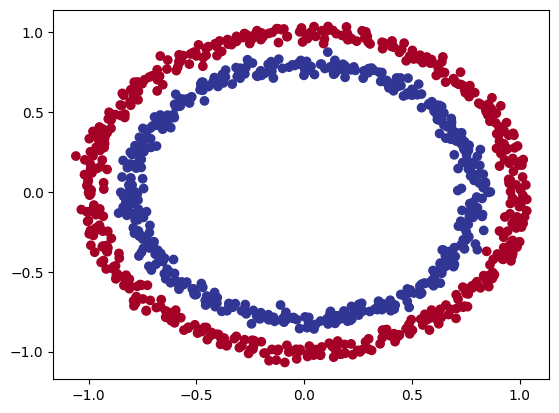

In [ ]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Turn to tensors
import torch 

In [ ]:
X = torch.from_numpy(X).type(torch.float)

In [ ]:
y = torch.from_numpy(y).type(torch.float)
y


tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Build a model
import torch
from torch import nn

#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # 5 hidden neurons, the bigger the number the model has more opportunities to learn
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # same shape as y - out
    
    # self.two_linear_layers = nn.Sequential(
    #   nn.Linear(in_features=2, out_features=5),
    #   nn.Linear(in_features=5, out_features=1)
    # )
  
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x->layer_1->layer_2->output
    # return self.two_linear_layers(x)

In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Replicate model above using nn.Sequential()
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0


In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6925,  0.1325],
                      [ 0.1290,  0.2506],
                      [ 0.5122, -0.2351],
                      [ 0.6829,  0.2425],
                      [-0.6078,  0.5141]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.1213,  0.0213, -0.3766,  0.5287, -0.3675], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.3194, -0.2629,  0.2911,  0.1994,  0.0734]], device='cuda:0')),
             ('layer_2.bias', tensor([0.4083], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

In [ ]:
untrained_preds[:5], X_test[:5], y_test[:10]

(tensor([[0.4117],
         [0.4044],
         [0.4223],
         [0.4087],
         [0.4088]], device='cuda:0'),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
# setup loss function and optimizer

#regression -> MAE MSE
#classification -> binary cross entropy, categorical cross entropy

loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function built in, log-sum-exp trick used
#nn.BCELoss - requires input to have gone through sigmoid activation function prior to input to BCELoss
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


In [ ]:
# going from raw logits -> prediction probabilities -> prediction labels
# model outputs are going to be raw logits
# convert logits to probabilites by passing through some activation function (sigmoid for binary, softmax for multiclass)
# then convert to labels by rounding (binary) or argmax (multiclass)
y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[0.4117],
        [0.4044],
        [0.4223],
        [0.4087],
        [0.4088]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# use sigmoid to turn our model logits to probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]


tensor([[0.6015],
        [0.5997],
        [0.6040],
        [0.6008],
        [0.6008]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
labels = torch.round(y_pred_probs[:5])
labels

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
# Train a model - loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  
  model_0.train()

  #fwd pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calc acc/loss
  loss = loss_fn(y_logits, y_pred) #nn.BCEWithLogitsLoss expects raw logits, nn.BCELoss expects prediction probabilities (with sigmoid)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #optim zero grad
  optimizer.zero_grad()

  #backprop
  loss.backward()

  #grad desc
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    #fwd
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calc loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.50886 | Acc: 50.00% | Test loss: 0.72212 | Test acc: 50.00%
Epoch: 10 | Loss: 0.30160 | Acc: 50.00% | Test loss: 0.83876 | Test acc: 50.00%
Epoch: 20 | Loss: 0.19657 | Acc: 50.00% | Test loss: 0.97840 | Test acc: 50.00%
Epoch: 30 | Loss: 0.13638 | Acc: 50.00% | Test loss: 1.11790 | Test acc: 50.00%
Epoch: 40 | Loss: 0.09954 | Acc: 50.00% | Test loss: 1.24834 | Test acc: 50.00%
Epoch: 50 | Loss: 0.07577 | Acc: 50.00% | Test loss: 1.36695 | Test acc: 50.00%
Epoch: 60 | Loss: 0.05970 | Acc: 50.00% | Test loss: 1.47374 | Test acc: 50.00%
Epoch: 70 | Loss: 0.04840 | Acc: 50.00% | Test loss: 1.56978 | Test acc: 50.00%
Epoch: 80 | Loss: 0.04017 | Acc: 50.00% | Test loss: 1.65640 | Test acc: 50.00%
Epoch: 90 | Loss: 0.03399 | Acc: 50.00% | Test loss: 1.73488 | Test acc: 50.00%


In [ ]:
loss_fn 

BCEWithLogitsLoss()

In [ ]:
#model is not learning, so lets visualize
#https://madewithml.com/#foundations 

import requests 
from pathlib import Path

#download function from repo if not downloaded

if Path("helper_functions.py").is_file():
  print("helper_functions.py exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  
from helper_functions import plot_predictions, plot_decision_boundary


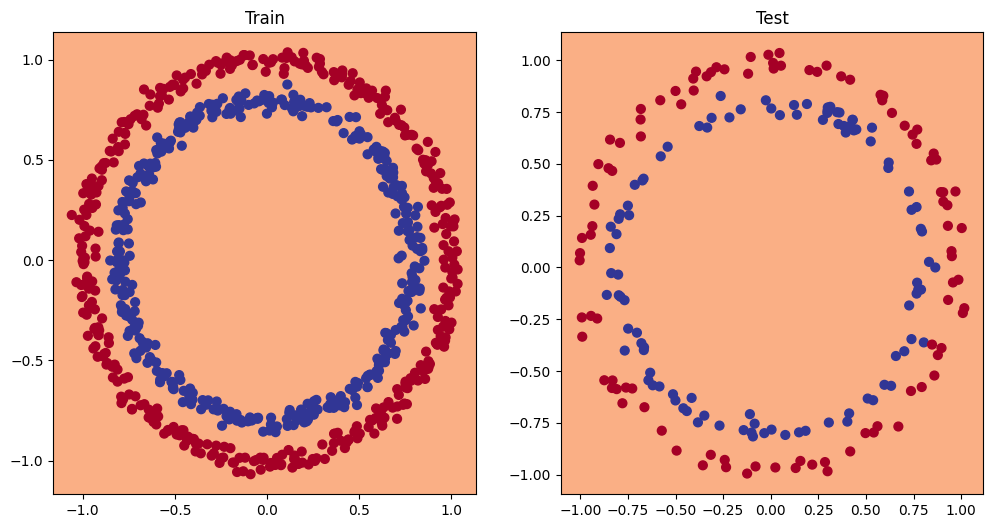

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2) 
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### improving a model from model's perspective
* add more layers
* add more hidden units
* fit for longer
* change/add activation functions (put within your model)
* change learning rate
* change loss function



In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))
  

In [ ]:
model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#create loss func
loss_fn = nn.BCEWithLogitsLoss()
#create optim
opt = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:
#write training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training
  model_1.train()

  #fwd pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # from logits to probabilities to labels

  #calc loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #zero grad
  opt.zero_grad()

  #backprop
  loss.backward()

  #grad descent
  opt.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    #fwd pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calc loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88 | Test loss: 0.69261 | Test acc: 51.00
Epoch: 100 | Loss: 0.69305 | Acc: 50.38 | Test loss: 0.69379 | Test acc: 48.00
Epoch: 200 | Loss: 0.69299 | Acc: 51.12 | Test loss: 0.69437 | Test acc: 46.00
Epoch: 300 | Loss: 0.69298 | Acc: 51.62 | Test loss: 0.69458 | Test acc: 45.00
Epoch: 400 | Loss: 0.69298 | Acc: 51.12 | Test loss: 0.69465 | Test acc: 46.00
Epoch: 500 | Loss: 0.69298 | Acc: 51.00 | Test loss: 0.69467 | Test acc: 46.00
Epoch: 600 | Loss: 0.69298 | Acc: 51.00 | Test loss: 0.69468 | Test acc: 46.00
Epoch: 700 | Loss: 0.69298 | Acc: 51.00 | Test loss: 0.69468 | Test acc: 46.00
Epoch: 800 | Loss: 0.69298 | Acc: 51.00 | Test loss: 0.69468 | Test acc: 46.00
Epoch: 900 | Loss: 0.69298 | Acc: 51.00 | Test loss: 0.69468 | Test acc: 46.00


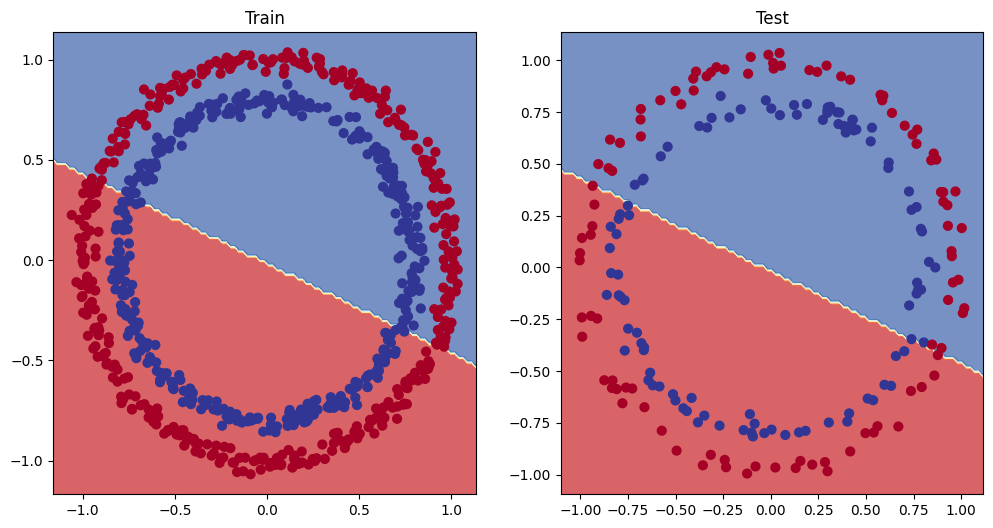

In [ ]:
#Plot decision boundary
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2) 
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

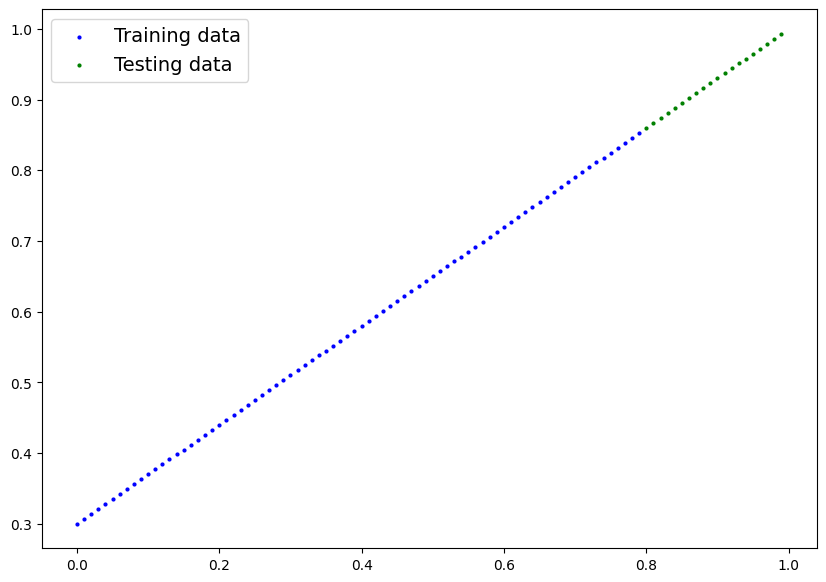

In [ ]:
# preparing data to see if our model can fit a straight line to see if it can learn anything
weight =  0.7
bias = 0.3
start, end, step = 0, 1, 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8*len(X_regression))

X_train_reg, y_train_reg = X_regression[:train_split], y_regression[:train_split] 
X_test_reg, y_test_reg = X_regression[train_split:], y_regression[train_split:] 

plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg)

In [ ]:
#Adjusting model_1 to fit this new test data
#using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer 
loss_fn_reg = nn.L1Loss()
opt_reg = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
#train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#put data on device
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device) 
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device) 

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_reg)
  loss = loss_fn_reg(y_pred, y_train_reg)
  opt_reg.zero_grad()
  loss.backward()
  opt_reg.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn_reg(test_pred, y_test_reg)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


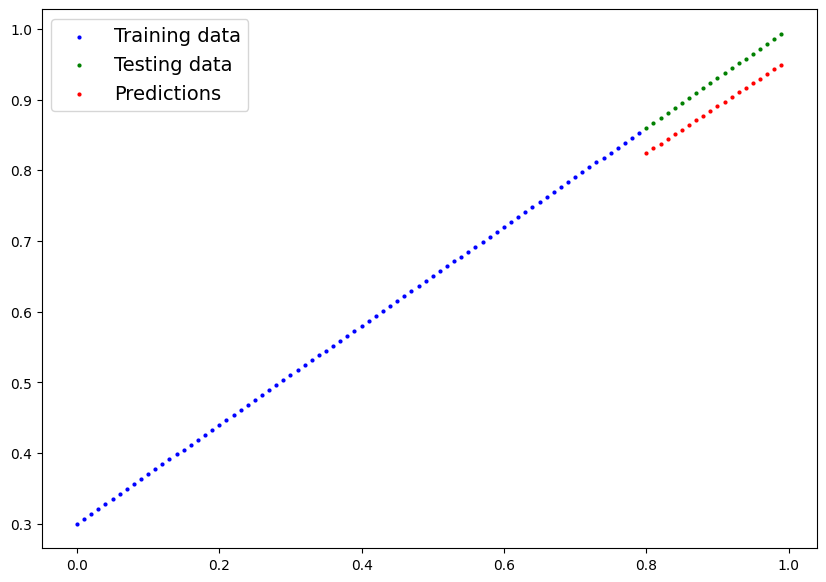

In [ ]:
model_2.eval()
with torch.inference_mode():
  preds = model_2(X_test_reg)
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=preds.cpu())

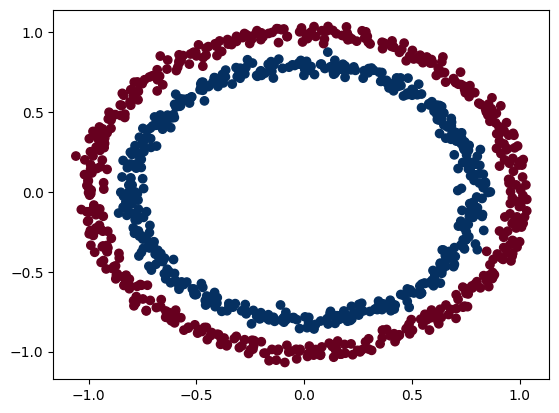

In [ ]:
# a missing piece: non-linearity
#recreating non-linear data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.RdBu, c=y)

In [ ]:
# convert data to tensors and then train/test split

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [ ]:
# building a model with non-linearity - non-linear activation functions
from torch import nn

class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    #where should we put non-linear activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3()
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
opt = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

model_3.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)  
X_test, y_test = X_test.to(device), y_test.to(device)  

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  opt.zero_grad()
  loss.backward()
  opt.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test loss: 0.69319 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test loss: 0.69102 | Test acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test loss: 0.68940 | Test acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test loss: 0.68723 | Test acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test loss: 0.68411 | Test acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test loss: 0.67941 | Test acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test loss: 0.67285 | Test acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test loss: 0.66322 | Test acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test loss: 0.64757 | Test acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test loss: 0.62145 | Test acc: 79.00%


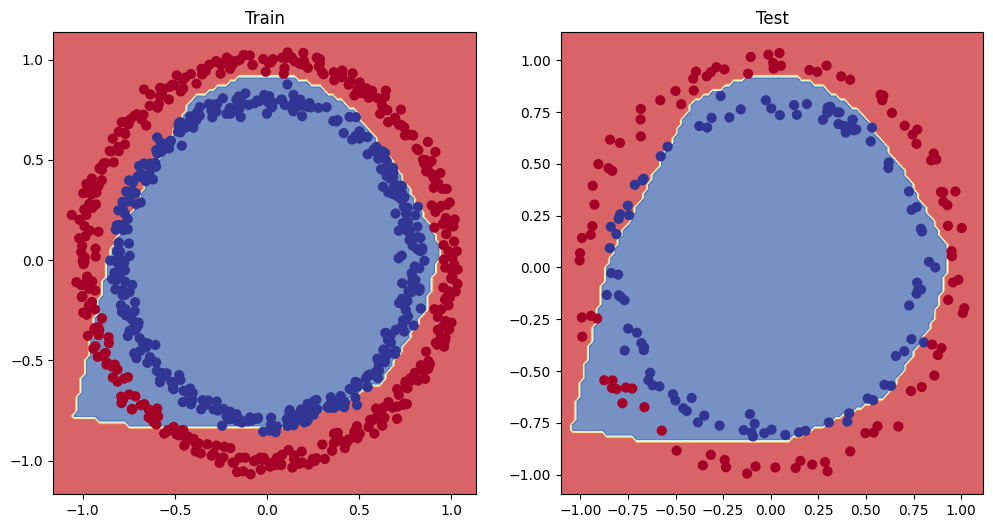

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2) 
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation functions
we give tools to neural network to discover patterns. the tools are activation functions


In [ ]:
import torch
import matplotlib.pyplot as plt
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

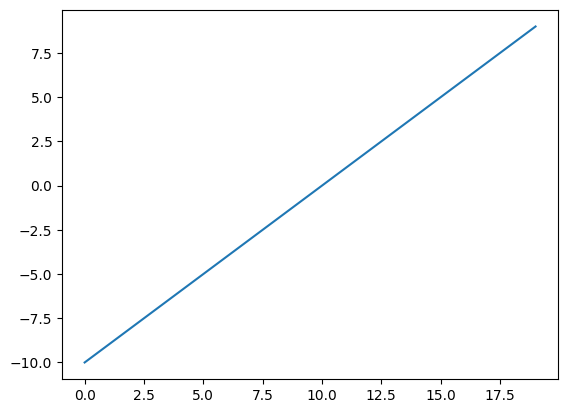

In [ ]:
plt.plot(A)

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

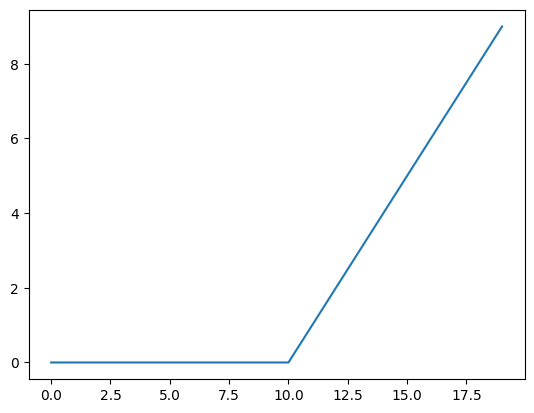

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

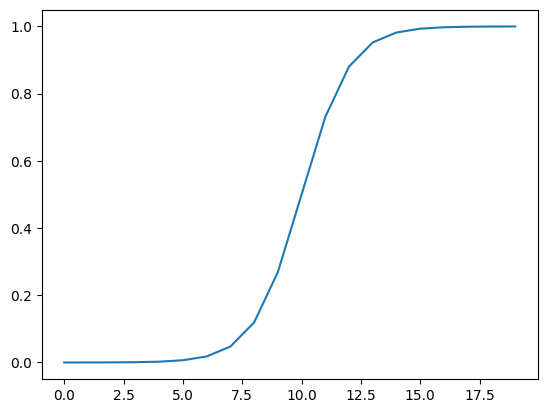

In [ ]:
plt.plot(torch.sigmoid(A))

## Multi-class classification

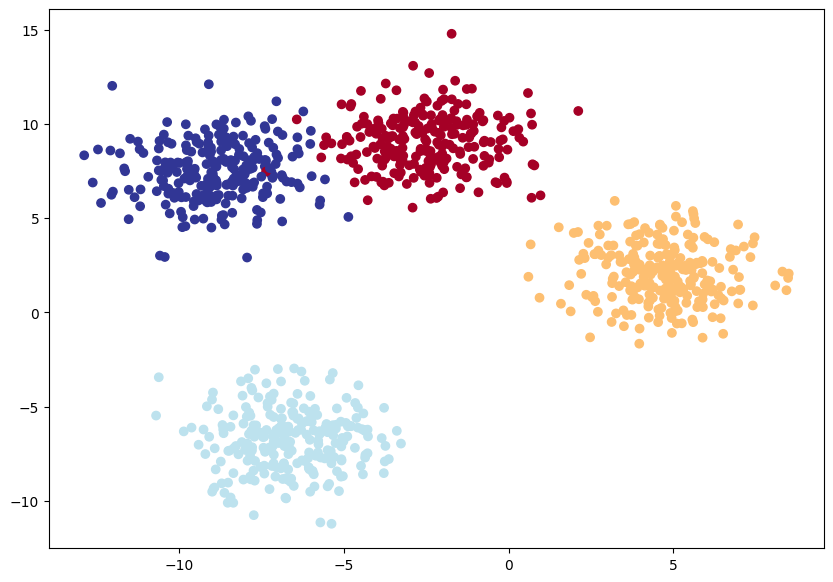

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#hyperparams for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

#turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float) #numpy float64, torch float32
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #numpy float64, torch float32

#split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

#plot
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Model for multi-class classification

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

#create instance of model and send to target device

model_0 = BlobModel(input_features=2, output_features=4)
model_0.to(device)

model_0


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
#create loss fn and optimizer
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
loss_fn = nn.CrossEntropyLoss()
#optimizer
opt = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# getting prediction probabilities for multi-class PyTorch model
#getting raw outputs of model - logits
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_blob_test.to(device))
y_logits[:5] #convert logits to probabilities to labels

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
#convert probabilities to labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
# training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set epochs
epochs = 100

#put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  
  opt.zero_grad()

  loss.backward()

  opt.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.4f} | Acc:{acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")



Epoch 0 | Loss: 1.1588 | Acc:40.38% | Test loss: 1.0755 | Test acc: 48.00%
Epoch 10 | Loss: 0.6448 | Acc:96.75% | Test loss: 0.6607 | Test acc: 97.50%
Epoch 20 | Loss: 0.4254 | Acc:98.50% | Test loss: 0.4307 | Test acc: 100.00%
Epoch 30 | Loss: 0.2529 | Acc:99.12% | Test loss: 0.2451 | Test acc: 99.50%
Epoch 40 | Loss: 0.1123 | Acc:99.25% | Test loss: 0.1023 | Test acc: 99.50%
Epoch 50 | Loss: 0.0663 | Acc:99.25% | Test loss: 0.0585 | Test acc: 99.50%
Epoch 60 | Loss: 0.0507 | Acc:99.25% | Test loss: 0.0429 | Test acc: 99.50%
Epoch 70 | Loss: 0.0430 | Acc:99.25% | Test loss: 0.0349 | Test acc: 99.50%
Epoch 80 | Loss: 0.0384 | Acc:99.25% | Test loss: 0.0299 | Test acc: 99.50%
Epoch 90 | Loss: 0.0352 | Acc:99.25% | Test loss: 0.0266 | Test acc: 99.50%


In [ ]:
# making and evaluating predictions with pytorch multi-class model
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

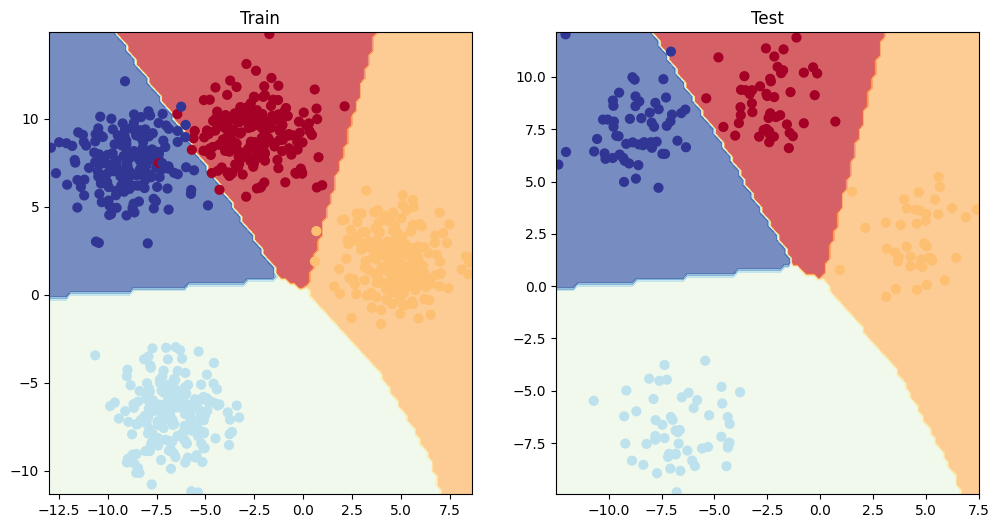

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_blob_test, y_blob_test)


# A few more classification metrics 
* Accuracy - for balanced classes https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* Precision
* Recall
* F1
* confusion-matrix
* classification report 



In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 27.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

t_acc = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)
t_acc(y_preds, y_blob_test)



tensor(0.9950, device='cuda:0')